# Show simulator functionality

In [5]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from axtreme.simulator import utils as sim_utils

root_dir = Path("../../../../")
sys.path.append(str(root_dir))
from examples.crest_heights_north_sea.problem.simulator import (
    max_crest_height_simulator_function,
    MaxCrestHeightSimulator,
)

In [2]:
hs = np.random.normal(1, size=100)
tp = np.random.normal(1, size=100)

dummy_environment = np.column_stack((hs, tp))

c_max = max_crest_height_simulator_function(x=dummy_environment, water_depth=110, sample_period=3)
print(c_max.shape)

(100, 1)


c:\Users\AMAKAIS\OneDrive - DNV\01_Projects\02_axtreme\axtreme\examples\crest_heights_north_sea\problem\documentation\..\..\..\..\examples\crest_heights_north_sea\problem\data\axtreme_case.py:37: RuntimeWarning: invalid value encountered in sqrt
  R = np.atleast_1d(Tp / np.sqrt(Hs))


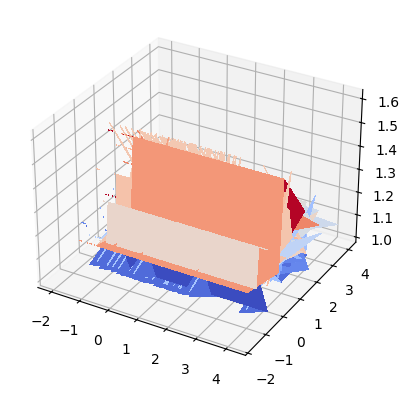

In [6]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Y = np.meshgrid(hs, tp)
Z = max_crest_height_simulator_function(x=np.column_stack((X, Y)), water_depth=110, sample_period=3)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

At the moment MaxCrestHeightSimulator produces different results at every run. Would be nice to have a seeded version.

Notes:
* the class ForristallCrest used in max_crest_height_simulator_function uses a Weibel distribution
* To Do: pass seed all the way down

In [3]:
sim = MaxCrestHeightSimulator()

print(sim(x=dummy_environment, water_depth=110, sample_period=3)[0, 5, 0, 0])
print("---")
print(sim(x=dummy_environment, water_depth=110, sample_period=3)[0, 5, 0, 0])

nan
---
nan


In [4]:
print(sim_utils.is_valid_simulator(sim, verbose=True))

True
